In [1]:
from types import SimpleNamespace
import math
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})
from scipy import optimize

%load_ext autoreload
%autoreload 2

*This notebook only provides a rough sketch of the required answers*

# Question 1

In [2]:
# Parameters
y = 1
p = 0.2
theta = -2

from InauguralProject2022 import *

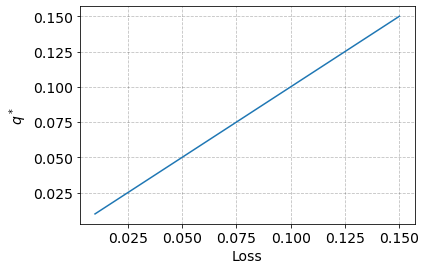

In [3]:
y = 0.2
p = 0.8
xs = np.linspace(0.01,0.15,10)
qs = np.empty((xs.size,))

for i,x in enumerate(xs):
    sol = opt_q(x,y,p)
    qs[i] = sol.x

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(xs, qs);
ax.set_xlabel('Loss');
ax.set_ylabel('$q^*$');

The optimal policy for the agent is to get **full coverage**. That is, we have a corner solution. 

# Question 2

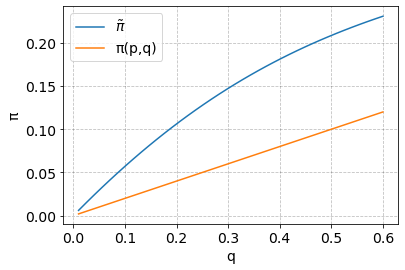

In [4]:
y = 1
x = 0.6
p = 0.2
π0 = 0.2
v0 = V_tilde(0, p, 0, x, y)

qs = np.linspace(0.01,x,40)
πs = np.empty(40)
sols = []

def obj(pi, p, q, x, y, v0):
    return V_tilde(pi, p, q, x, y) - v0

for i,q in enumerate(qs):
    sol = optimize.root(obj, π0, args=(p, q, x, y, v0))
    πs[i] = sol.x[0] 
    sols.append(sol)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(qs, πs, label='$\\tilde{\pi}$');
ax.plot(qs, p*qs, label='π(p,q)');
ax.set_xlabel('q');
ax.set_ylabel('π');
ax.legend();



This graph could be a lot nicer. Students can shade the area and make much more explanatory. 

# Question 3

In [5]:
mp = SimpleNamespace()
mp.y = 1
mp.theta = -2
mp.N = 100000
mp.a = 2
mp.b = 7

pol1 = SimpleNamespace()
pol1.gamma = 0.90
pol1.pi = 0.2

pol2 = SimpleNamespace()
pol2.gamma = 0.45
pol2.pi = 0.1

pol0 = SimpleNamespace()
pol0.gamma = 0
pol0.pi = 0

# Test the two policies
print('no policy:', mc_value(mp, pol0))
print('policy 1:', mc_value(mp, pol1))
print('policy 2:', mc_value(mp, pol2))

no policy: -1.334632911471295
policy 1: -1.2860990576286773
policy 2: -1.297695901240753


Policy 1 is the better choice

# Question 4

In [6]:
def objective(pi, mp, pol, v0):
    pol.pi = pi
    return mc_value(mp, pol) - v0

In [7]:
# Policy to make the customer indifferent between not having an insurance
pol0 = SimpleNamespace()
pol0.gamma = 0
pol0.pi = 0
v0 = mc_value(mp, pol0)

# Settings for client wanting high coverage
pol_opt = SimpleNamespace()
pol_opt.gamma = 0.95
pol_opt.pi = 0.1
π0 = 0.5

# Find profit maximizing π 
sol = optimize.root(objective, π0, args=(mp, pol_opt, v0), method='broyden1')
print(sol)

     fun: array([4.90689145e-06])
 message: 'A solution was found at the specified tolerance.'
     nit: 10
  status: 1
 success: True
       x: array(0.23836862)


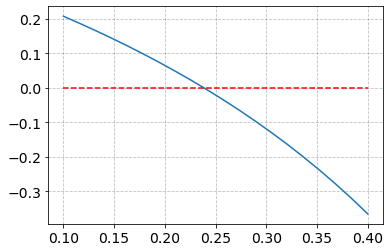

In [8]:

import copy as copy
n = 20
πs = np.linspace(0.1,0.40,n)
objs = np.empty(n)
pol_i = copy.copy(pol_opt)

for i,pi in enumerate(πs):
    objs[i] = objective(pi,mp, pol_i, v0) 

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(πs,objs);
ax.hlines(0,0.1,0.4,linestyles='dashed',color='red');


The graph above is just to ensure the correct solution is found when calling the solver. The blue line shows $V(\pi,q) - V_0$. At the intersection with the red dotted line, the profit of the insurance company is maximized as client is indifferent to not having an insurance. 